In [1]:
import numpy as np

import json
import tensorflow as tf

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences


In [2]:
vocab_size = 1000
embedding_dim = 16
max_length = 120
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"
training_size = 20000

In [3]:
with open("C:/Users/Teja/Desktop/dsml/tensorflow_training/sarcasm.json") as f:
    datastore = json.load(f)

In [4]:
sentences = []
labels = []
urls = []
for item in datastore:
    sentences.append(item['headline'])
    labels.append(item['is_sarcastic'])

In [5]:
training_sentences = sentences[0:training_size]
testing_sentences = sentences[training_size:]
training_labels = labels[0:training_size]
testing_labels = labels[training_size:]

In [6]:
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)

In [7]:
word_index = tokenizer.word_index

training_sequences = tokenizer.texts_to_sequences(training_sentences)
training_padded = pad_sequences(training_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

In [8]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [9]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 120, 16)           16000     
_________________________________________________________________
bidirectional (Bidirectional (None, 64)                12544     
_________________________________________________________________
dense (Dense)                (None, 24)                1560      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 25        
Total params: 30,129
Trainable params: 30,129
Non-trainable params: 0
_________________________________________________________________


In [10]:
num_epochs = 50
training_padded = np.array(training_padded)
training_labels = np.array(training_labels)
testing_padded = np.array(testing_padded)
testing_labels = np.array(testing_labels)
history = model.fit(training_padded,
                    training_labels,
                    epochs=num_epochs,
                    validation_data=(testing_padded, testing_labels),
                    verbose=1)

Epoch 1/50
625/625 [==============================] - 48s 76ms/step - loss: 0.4495 - accuracy: 0.7763 - val_loss: 0.4038 - val_accuracy: 0.8114
Epoch 2/50
625/625 [==============================] - 48s 77ms/step - loss: 0.3589 - accuracy: 0.8362 - val_loss: 0.3836 - val_accuracy: 0.8214
Epoch 3/50
625/625 [==============================] - 47s 76ms/step - loss: 0.3423 - accuracy: 0.8447 - val_loss: 0.3729 - val_accuracy: 0.8328
Epoch 4/50
625/625 [==============================] - 49s 78ms/step - loss: 0.3228 - accuracy: 0.8546 - val_loss: 0.3670 - val_accuracy: 0.8353
Epoch 5/50
625/625 [==============================] - 47s 75ms/step - loss: 0.3058 - accuracy: 0.8637 - val_loss: 0.3724 - val_accuracy: 0.8329
Epoch 6/50
625/625 [==============================] - 47s 75ms/step - loss: 0.2928 - accuracy: 0.8682 - val_loss: 0.3862 - val_accuracy: 0.8346
Epoch 7/50
625/625 [==============================] - 46s 74ms/step - loss: 0.2822 - accuracy: 0.8762 - val_loss: 0.3866 - val_accuracy:

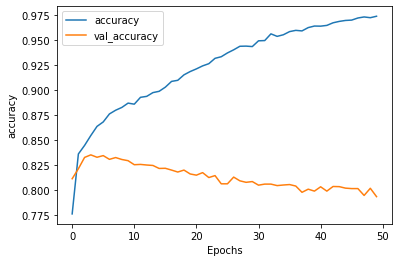

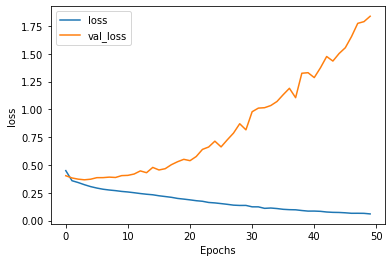

In [11]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

plot_graphs(history, 'accuracy')
plot_graphs(history, 'loss')